In [22]:
import numpy as np
import matplotlib.pyplot as plt

import random
from numpy.random import randint as rnd

MAZE_WIDTH: int  = 8
MAZE_HEIGHT: int = 8 

In [3]:
# start
remaining = MAZE_HEIGHT * MAZE_WIDTH - 1

directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
def choose_direction(): 
    dirr = rnd(4)
    nx, ny = directions[dirr]
    return dirr, (nx, ny)

def check_border(curr, nx, ny, width, height):
    currx = curr[1] + nx
    curry = curr[0] + ny
    return (currx >= 0) and (currx < width) and (curry < height) and (curry >= 0)

In [39]:

def wilson_maze(width, height):
    """
    Generate a maze using Wilson's algorithm with fixed start and end points.

    :param width: Width of the maze grid (number of cells horizontally).
    :param height: Height of the maze grid (number of cells vertically).
    :return: A 2D NumPy array representing the maze, where 0 = wall, 1 = passage.
    """
    # Initialize maze grid with walls
    maze = np.zeros((height * 2 + 1, width * 2 + 1), dtype=np.uint8)

    # Fixed start and end points
    start = (0, 0)
    end = (width - 1, height - 1)

    # Initialize visited set with the start point
    visited = {start}

    # Directions: (dy, dx)
    directions = {
        'N': (-1, 0),
        'S': (1, 0),
        'E': (0, 1),
        'W': (0, -1)
    }

    def add_to_maze(path):
        """Helper function to add a path to the maze."""
        for i in range(len(path) - 1):
            x1, y1 = path[i]
            x2, y2 = path[i + 1]

            # Mark the current and next cells as passages
            maze[y1 * 2 + 1, x1 * 2 + 1] = 1
            maze[y2 * 2 + 1, x2 * 2 + 1] = 1

            # Mark the wall between cells as passage
            wall_x = x1 + x2 + 1
            wall_y = y1 + y2 + 1
            maze[wall_y, wall_x] = 1

    # Generate the maze
    while len(visited) < width * height:
        # Start a random walk from an unvisited cell
        current_cell = None
        while current_cell is None or current_cell in visited:
            current_cell = (random.randint(0, width - 1), random.randint(0, height - 1))

        path = [current_cell]
        while path[-1] not in visited:
            cx, cy = path[-1]
            direction = random.choice(list(directions.values()))
            nx, ny = cx + direction[1], cy + direction[0]

            # Ensure the next cell is within bounds
            if 0 <= nx < width and 0 <= ny < height:
                path.append((nx, ny))

        # Erase loops in the random walk
        no_loops_path = []
        seen = set()
        for cell in path:
            if cell in seen:
                # Remove the loop
                while no_loops_path[-1] != cell:
                    seen.remove(no_loops_path.pop())
            else:
                seen.add(cell)
                no_loops_path.append(cell)

        # Add the processed path to the maze and the visited set
        visited.update(no_loops_path)
        add_to_maze(no_loops_path)

    # Ensure the start and end points are open
    maze[start[1] * 2 + 1, start[0] * 2 + 1] = 2
    maze[end[1] * 2 + 1, end[0] * 2 + 1] = 3

    return maze

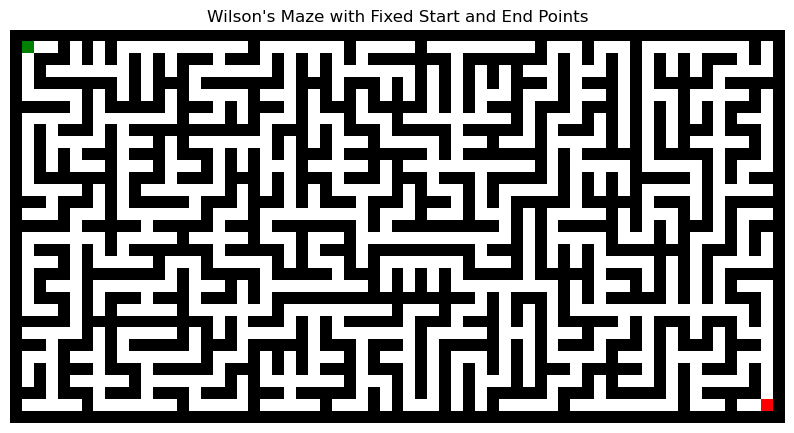

In [42]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['black', 'white', 'green', 'red'])

# Generate and display the maze
width, height = 32, 16  # Dimensions of the maze
maze = wilson_maze(width, height)

plt.figure(figsize=(10, 10))
plt.imshow(maze, cmap=cmap)
plt.axis('off')
plt.title("Wilson's Maze with Fixed Start and End Points")
plt.show()

In [107]:
import heapq

def get_optimal_path(maze, start, end):
    start, end = tuple(start), tuple(end)

    possible_movement = [
        [-1,  0],
        [ 1,  0],
        [ 0, -1],
        [ 0,  1]
    ]

    def h(pos): return abs(end[0] - pos[0]) + abs(end[1] - pos[1])
    def is_valid(npos):
        y, x = npos
        border_check = 0 <= y < maze.shape[0] and 0 <= x < maze.shape[1]
        return border_check and maze[y, x] != 0

    openSet  = []
    closeSet = {}
    scores   = {tuple(start): 0}
    heapq.heappush(openSet, (0, start))

    def build_path(current, closeSet):
        path = []
        while current in closeSet:
            path.append(current)
            current = closeSet[current]
        path.append(start)
        path.reverse()
        return path
    
    while len(openSet) > 0: 
        cg, cpos = heapq.heappop(openSet)
        if cpos == end:
            print("Path Found")
            return build_path(cpos, closeSet)

        for dirr in possible_movement:
            npos = (cpos[0] + dirr[0], cpos[1] + dirr[1])
            if not is_valid(npos): continue
            
            tentative = cg + 1
            if tuple(npos) not in scores or tentative < cg:
                scores[tuple(npos)] = tentative
                heapq.heappush(openSet, (tentative + h(npos), npos))
                closeSet[tuple(npos)] = cpos

    return []

optim = get_optimal_path(maze, np.array((1, 1)), np.array([31, 63]))

Path Found


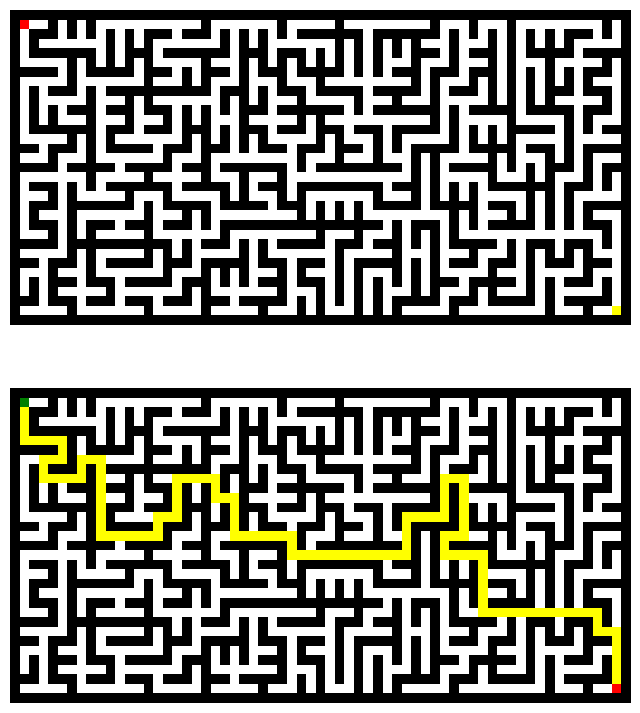

In [116]:
_, ax = plt.subplots(2, 1, figsize = (18,  9))
cmap = ListedColormap(['black', 'white', 'green', 'red', 'yellow'])
ax[0].imshow(maze, cmap=cmap)
ax[0].axis('off')

solved_maze = maze.copy()
for (y, x) in optim: 
    if y == 1 and x == 1: continue
    if y == (solved_maze.shape[0] - 2) and x == (solved_maze.shape[1] - 2): continue
    solved_maze[y, x] = 4 

ax[1].imshow(solved_maze, cmap=cmap)
ax[1].axis('off')


plt.show()